In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('data/training_final_latcorr.csv')

In [5]:
pd.set_option('display.max_columns', None)
df

,field_1,Name,Longitude,Latitude,CO2 (mg C m¯² d¯¹),CH4 (mg C m-2 d-1),CO2 (g/kWh),CH4 (g/kWh),Area / Electricity,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_spring_avg,temp_summer_avg_lc,temp_summer_avg,temp_fall_avg_lc,temp_fall_avg,temp_winter_avg_lc,temp_winter_avg,NDVI_annual_avg,NDVI_spring_avg_lc,NDVI_spring_avg,NDVI_summer_avg_lc,NDVI_summer_avg,NDVI_fall_avg_lc,NDVI_fall_avg,NDVI_winter_avg_lc,NDVI_winter_avg,npp_annual_avg,npp_spring_avg_lc,npp_spring_avg,npp_summer_avg_lc,npp_summer_avg,npp_fall_avg_lc,npp_fall_avg,npp_winter_avg_lc,npp_winter_avg,erosion
0,116,Segredo,-52.100000,-25.783333,600.0,29.9,15.167696,0.274857,0.018889,82.0,13.0,3.0,27.333333,48.768551,17.059999,18.243999,17.054667,20.768000,13.137333,17.054667,18.243999,13.137333,20.768000,200.666672,212.666672,221.333328,238.666672,219.333328,221.333328,212.666672,219.333328,238.666672,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389
1,117,Segredo,-52.100000,-25.783333,1306.1,5.0,33.017545,0.045963,0.018889,82.0,13.0,3.0,27.333333,48.768551,17.059999,18.243999,17.054667,20.768000,13.137333,17.054667,18.243999,13.137333,20.768000,200.666672,212.666672,221.333328,238.666672,219.333328,221.333328,212.666672,219.333328,238.666672,200.500000,212.000000,207.666672,202.000000,180.333328,207.666672,212.000000,180.333328,202.000000,21.503389
2,45,Itaipu,-54.550000,-25.383333,328.6,NaN,6.603175,NaN,0.015015,1350.0,14.0,129.0,10.465116,44.606594,21.125334,21.429333,21.202667,25.158667,16.773333,21.202667,21.429333,16.773333,25.158667,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,87.000000,79.000000,85.333336,87.000000,96.666664,85.333336,79.000000,96.666664,87.000000,32.145058
3,104,RibeirÃ£o das Lages,-43.883333,-22.700000,22.1,NaN,NaN,NaN,NaN,30.0,95.0,0.5,60.000000,60.257137,20.374001,20.393333,20.902666,23.022667,17.549334,20.902666,20.393333,17.549334,23.022667,232.333328,226.000000,242.333328,237.666672,223.333328,242.333328,226.000000,223.333328,237.666672,151.416672,153.333328,179.333328,156.666672,170.666672,179.333328,153.333328,170.666672,156.666672,0.541019
4,7,Barra Bonita,-48.583333,-22.516667,1036.4,9.9,3187.260766,11.071149,2.297872,324.0,42.0,4.0,81.000000,37.520664,20.853001,21.605333,20.834667,23.501333,17.721333,20.834667,21.605333,17.721333,23.501333,160.250000,123.666664,178.333328,187.333328,151.666672,178.333328,123.666664,151.666672,187.333328,132.750000,94.000000,166.000000,130.000000,141.000000,166.000000,94.000000,141.000000,130.000000,7.974369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,68,Lule,21.666667,65.833333,12.3,NaN,20.541089,NaN,1.247826,574.0,70.0,NaN,NaN,61.908791,1.616667,0.884000,0.884000,14.160000,14.160000,1.786667,1.786667,-10.181334,-10.181334,131.750000,106.333336,106.333336,226.000000,226.000000,159.333328,159.333328,35.333332,35.333332,99.250000,58.333332,58.333332,180.333328,180.333328,51.333332,51.333332,107.000000,107.000000,0.004779
150,66,Lokka,27.733333,67.816667,545.5,79.0,632.052667,33.285333,0.865753,316.0,28.0,2.1,150.476191,60.026501,-1.679333,-3.041333,-3.041333,11.264000,11.264000,-1.165333,-1.165333,-13.594666,-13.594666,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,95.583336,47.666668,47.666668,114.000000,114.000000,39.666668,39.666668,181.000000,181.000000,0.001489
151,67,Lokka,27.733333,67.816667,288.0,115.0,333.696000,48.453333,0.865753,316.0,28.0,2.1,150.476191,60.026501,-1.679333,-3.041333,-3.041333,11.264000,11.264000,-1.165333,-1.165333,-13.594666,-13.594666,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,95.583336,47.666668,47.666668,114.000000,114.000000,39.666668,39.666668,181.000000,181.000000,0.001489
152

In [6]:
# drop columns we're not using
df['kWh'] = df['Area_km2'] / df['Area / Electricity']
df = df.drop(['Longitude', 'CO2 (g/kWh)', 'CH4 (g/kWh)', 'Area / Electricity', 'Name', 'field_1',
              'temp_spring_avg', 'temp_summer_avg', 'temp_fall_avg', 'temp_winter_avg', 
              'NDVI_spring_avg', 'NDVI_summer_avg', 'NDVI_fall_avg', 'NDVI_winter_avg', 
              'npp_spring_avg' , 'npp_summer_avg' , 'npp_fall_avg' , 'npp_winter_avg'], axis=1)

In [7]:
# rename CO2 and CH4 columns
df.rename(columns = {'CH4 (mg C m-2 d-1)':'CH4', 'CO2 (mg C m¯² d¯¹)':'CO2'}, inplace = True) 

In [8]:
ch4 = df.drop(['CO2'], axis=1)
ch4 = ch4[ch4['CH4'].notna()]

In [9]:
ch4.shape

(98, 24)

count      98.000000
mean       53.637959
std       135.005121
min         0.010000
25%         4.325000
50%        12.600000
75%        45.750000
max      1140.000000
Name: CH4, dtype: float64

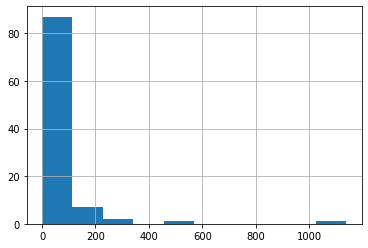

In [10]:
ch4['CH4'].hist()
ch4['CH4'].describe()

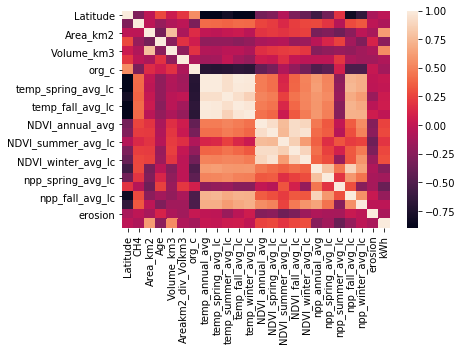

In [11]:
import seaborn as sns

corr = ch4.sort_values('CH4', ascending=False).head(100).corr()
sns.heatmap(corr)

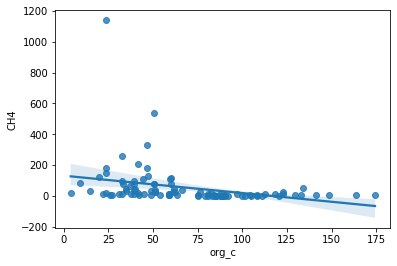

In [12]:
sns.regplot(x = 'org_c',
            y = 'CH4',
            data = ch4)#.set(ylim=(0,2000))

In [13]:
for column in ch4:
    print(column, ':',  ch4[column].isna().sum())

Latitude : 0
CH4 : 0
Area_km2 : 2
Age : 1
Volume_km3 : 7
Areakm2_div_Volkm3 : 8
org_c : 2
temp_annual_avg : 0
temp_spring_avg_lc : 0
temp_summer_avg_lc : 0
temp_fall_avg_lc : 0
temp_winter_avg_lc : 0
NDVI_annual_avg : 0
NDVI_spring_avg_lc : 0
NDVI_summer_avg_lc : 0
NDVI_fall_avg_lc : 0
NDVI_winter_avg_lc : 0
npp_annual_avg : 0
npp_spring_avg_lc : 0
npp_summer_avg_lc : 0
npp_fall_avg_lc : 0
npp_winter_avg_lc : 0
erosion : 0
kWh : 16


In [14]:
from sklearn.impute import KNNImputer
model_impute = KNNImputer(n_neighbors=int(np.sqrt(ch4.shape[0])))
ch4_imputed = model_impute.fit_transform(ch4)

In [15]:
ch4_imputed = pd.DataFrame(columns=ch4.columns, data=ch4_imputed)

In [16]:
for column in ch4_imputed:
    print(column, ':',  ch4_imputed[column].isna().sum())

Latitude : 0
CH4 : 0
Area_km2 : 0
Age : 0
Volume_km3 : 0
Areakm2_div_Volkm3 : 0
org_c : 0
temp_annual_avg : 0
temp_spring_avg_lc : 0
temp_summer_avg_lc : 0
temp_fall_avg_lc : 0
temp_winter_avg_lc : 0
NDVI_annual_avg : 0
NDVI_spring_avg_lc : 0
NDVI_summer_avg_lc : 0
NDVI_fall_avg_lc : 0
NDVI_winter_avg_lc : 0
npp_annual_avg : 0
npp_spring_avg_lc : 0
npp_summer_avg_lc : 0
npp_fall_avg_lc : 0
npp_winter_avg_lc : 0
erosion : 0
kWh : 0


In [17]:
from sklearn.preprocessing import StandardScaler

data = ch4_imputed.drop(['CH4'], axis=1).copy()

scaler = StandardScaler()

ch4_scaled = pd.DataFrame(scaler.fit_transform(data),columns=ch4.columns[1:])

In [18]:
ch4_scaled.head(10)

,CH4,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_summer_avg_lc,temp_fall_avg_lc,temp_winter_avg_lc,NDVI_annual_avg,NDVI_spring_avg_lc,NDVI_summer_avg_lc,NDVI_fall_avg_lc,NDVI_winter_avg_lc,npp_annual_avg,npp_spring_avg_lc,npp_summer_avg_lc,npp_fall_avg_lc,npp_winter_avg_lc,erosion,kWh
0,-1.886035,-0.547924,-0.967189,-0.433627,-0.545451,-0.565552,0.690532,0.787489,0.514966,0.623463,0.745659,0.408161,0.682025,0.675381,0.538416,0.832115,3.220547,3.008378,1.165633,3.118491,1.853590,1.208241,0.059015
1,-1.886035,-0.547924,-0.967189,-0.433627,-0.545451,-0.565552,0.690532,0.787489,0.514966,0.623463,0.745659,0.408161,0.682025,0.675381,0.538416,0.832115,3.220547,3.008378,1.165633,3.118491,1.853590,1.208241,0.059015
2,-1.775564,-0.261174,0.300490,-0.385958,-0.197602,-0.879614,1.030599,1.063823,0.965749,0.999553,1.014583,-0.267582,-0.514319,-0.554599,-0.256661,0.046779,1.124689,0.251586,-0.195247,2.050067,1.157470,0.274100,-0.526077
3,-1.775564,-0.613094,0.169351,-0.552801,-0.372606,-0.271596,1.012399,1.020197,0.920451,1.016666,1.005118,0.116965,0.130900,-0.450770,0.168613,0.240211,1.539736,1.053703,0.333984,1.862024,1.133873,-0.262521,-0.416586
4,-1.775564,-0.613094,0.169351,-0.552801,-0.372606,-0.271596,1.012399,1.020197,0.920451,1.016666,1.005118,0.116965,0.130900,-0.450770,0.168613,0.240211,1.539736,1.053703,0.333984,1.862024,1.133873,-0.262521,-0.416586
5,-1.775564,-0.613094,0.213064,-0.552801,-0.372606,-0.271596,1.012399,1.020197,0.920451,1.016666,1.005118,0.116965,0.130900,-0.450770,0.168613,0.240211,1.539736,1.053703,0.333984,1.862024,1.133873,-0.262521,-0.416586
6,-1.695529,-0.591765,0.125638,-0.514665,-0.498251,-0.494206,1.070019,1.109532,0.871634,1.065087,1.065270,-0.098994,-0.115538,-0.434796,-0.145720,0.042910,0.616836,-0.277968,-0.151145,1.391917,0.809411,-0.265955,0.010371
7,-1.695529,-0.591765,0.125638,-0.514665,-0.498251,-0.494206,1.070019,1.109532,0.871634,1.065087,1.065270,-0.098994,-0.115538,-0.434796,-0.145720,0.042910,0.616836,-0.277968,-0.151145,1.391917,0.809411,-0.265955,0.010371
8,-1.695529,-0.591765,0.169351,-0.514665,-0.498251,-0.494206,1.070019,1.109532,0.871634,1.065087,1.065270,-0.098994,-0.115538,-0.434796,-0.145720,0.042910,0.616836,-0.277968,-0.151145,1.391917,0.809411,-0.265955,0.010371
9,-1.653820,-0.584656,-1.098328,-0.195279,-0.681295,-0.630578,1.108959,1.182644,0.847006,1.067873,1.138329,0.196382,-0.196190,0.299997,0.519926,0.158970,0.560121,-0.254605,-0.176346,1.263706,0.774015,1.478969,-0.326180


## MLR for CH4

In [19]:
X = ch4_scaled
Y = ch4['CH4']

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Baseline

In [21]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train, y_train)
dummy_regr.predict(x_train)
baseline = dummy_regr.score(x_train, y_train)
print("Baseline R^2: %f" %baseline)

Baseline R^2: 0.000000


### MLR first fit

In [22]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

ols.fit(x_train,y_train)
print("Coeficients:")
print(pd.DataFrame(zip(x_train.columns, ols.coef_)).sort_values(by=1))
print("R^2: %f" %(ols.score(x_train, y_train)))

Coeficients:
                     0           1
6      temp_annual_avg -278.006089
10  temp_winter_avg_lc -125.993690
8   temp_summer_avg_lc  -90.955984
18   npp_summer_avg_lc  -39.888150
12  NDVI_spring_avg_lc  -36.833653
20   npp_winter_avg_lc  -32.230973
19     npp_fall_avg_lc  -28.642173
17   npp_spring_avg_lc  -16.145576
22                 kWh  -15.242810
5                org_c  -13.712524
2                  Age  -12.184099
11     NDVI_annual_avg   -5.470836
4   Areakm2_div_Volkm3   -3.207401
1             Area_km2   -2.757072
3           Volume_km3   -2.700071
21             erosion    7.816208
14    NDVI_fall_avg_lc   11.652360
13  NDVI_summer_avg_lc   11.829052
15  NDVI_winter_avg_lc   34.071406
0                  CH4   37.928329
16      npp_annual_avg   58.177024
9     temp_fall_avg_lc  157.109811
7   temp_spring_avg_lc  386.735166
R^2: 0.480033


#### check for multicolinearity

In [23]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x_train.columns).T

,CH4,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,temp_spring_avg_lc,temp_summer_avg_lc,temp_fall_avg_lc,temp_winter_avg_lc,NDVI_annual_avg,NDVI_spring_avg_lc,NDVI_summer_avg_lc,NDVI_fall_avg_lc,NDVI_winter_avg_lc,npp_annual_avg,npp_spring_avg_lc,npp_summer_avg_lc,npp_fall_avg_lc,npp_winter_avg_lc,erosion,kWh
vif,31.381815,3.502012,1.79903,2.965575,1.729772,4.398561,13057.161945,1100.858168,599.092315,567.125163,3151.224984,16.967958,35.183253,11.724566,24.222199,30.617033,557.380181,81.127393,124.195757,57.569166,109.47344,1.704632,1.953202


In [24]:
# dropping all seasonal averages :''''''(

x_train = x_train.drop(['NDVI_spring_avg_lc','NDVI_summer_avg_lc','NDVI_fall_avg_lc','NDVI_winter_avg_lc',
                       'temp_spring_avg_lc', 'temp_fall_avg_lc', 'temp_summer_avg_lc', 'temp_winter_avg_lc',
                       'npp_spring_avg_lc', 'npp_summer_avg_lc', 'npp_winter_avg_lc', 'npp_fall_avg_lc'], axis=1)

vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x_train.columns).T

,CH4,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,NDVI_annual_avg,npp_annual_avg,erosion,kWh
vif,6.477333,3.123553,1.292474,2.640688,1.282807,2.51536,8.887938,1.809079,2.41839,1.228185,1.657328


In [25]:
# this is a bit better...

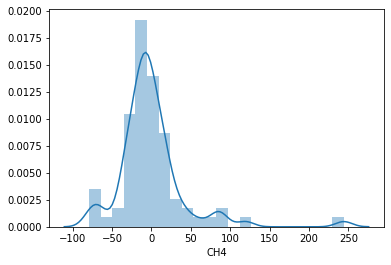

In [26]:
# residual normality
ols.fit(x_train,y_train)
residual = y_train - ols.predict(x_train)

sns.distplot(residual)

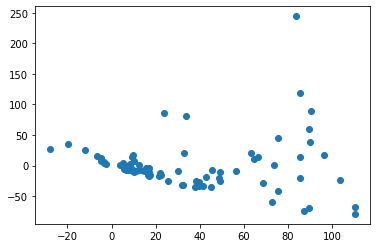

In [27]:
# homoscedasticity 

plt.scatter(ols.predict(x_train), residual)


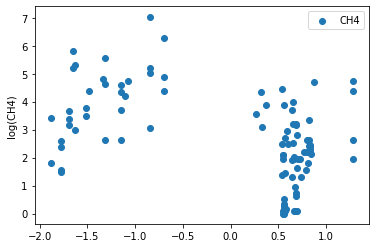

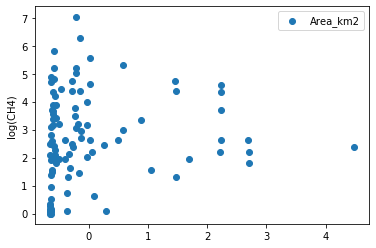

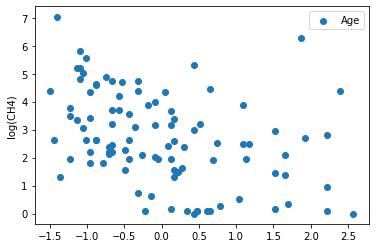

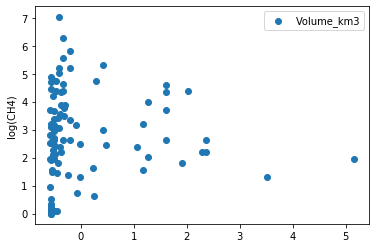

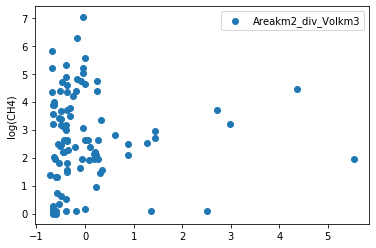

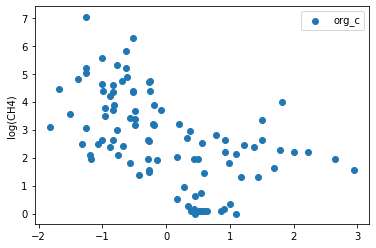

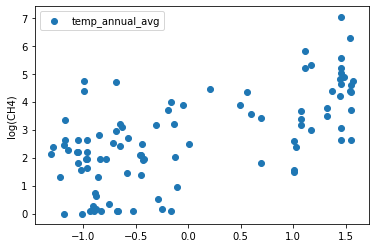

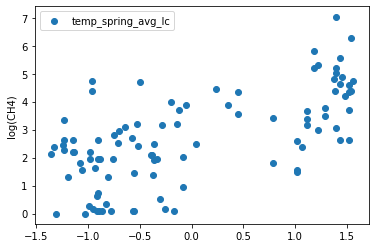

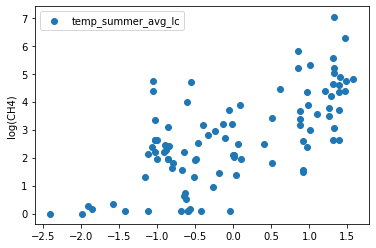

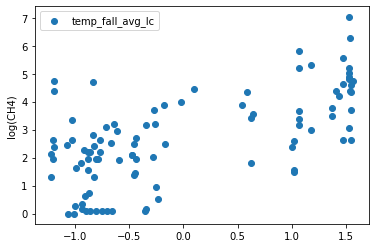

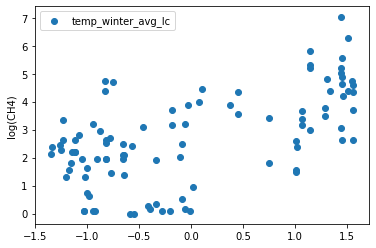

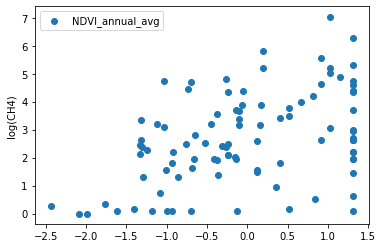

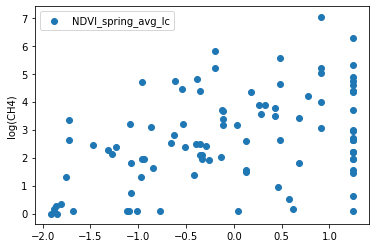

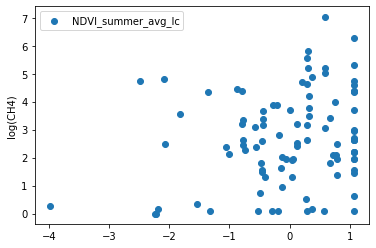

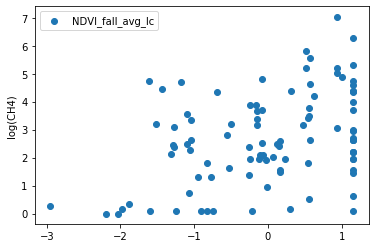

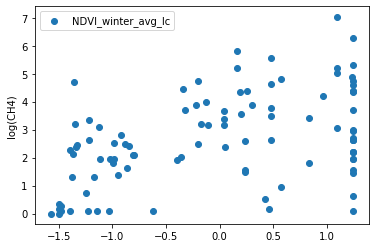

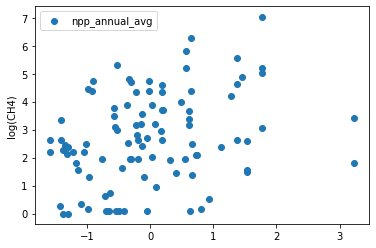

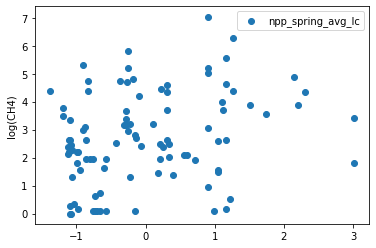

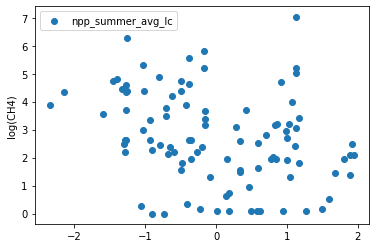

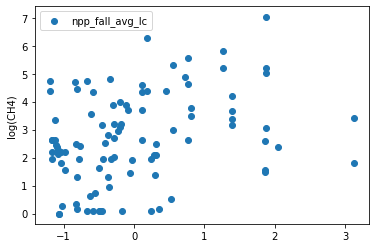

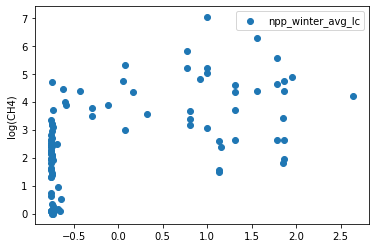

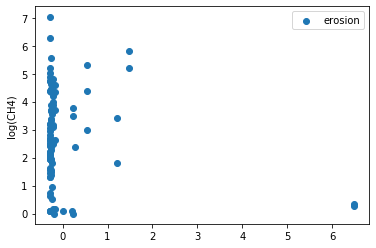

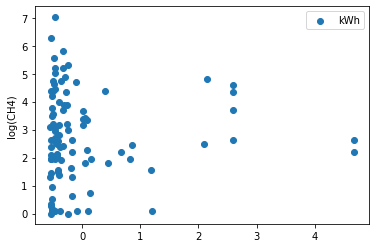

In [28]:
ch4['ch4_log_scale'] = np.log(ch4['CH4'] - ch4['CH4'].min() + 1)

for col in ch4_scaled:
    plt.scatter(ch4_scaled[col], ch4['ch4_log_scale'], label=col)
    plt.ylabel("log(CH4)")
    plt.legend()
    plt.show()

### Tuning MLR


In [29]:
ols2 = linear_model.LinearRegression()

ols2.fit(x_train,y_train)
print("Intercept: %f" %ols2.intercept_)
print("Coeficients:")
print(pd.DataFrame(zip(x_train.columns, ols2.coef_)).sort_values(by=1))
print("R^2: %f" %(ols2.score(x_train, y_train)))

Intercept: 35.407917
Coeficients:
                     0          1
8       npp_annual_avg -14.453423
2                  Age -12.680437
10                 kWh -10.841113
5                org_c  -3.985068
1             Area_km2  -3.245468
3           Volume_km3   0.993118
4   Areakm2_div_Volkm3   1.081045
9              erosion   5.222788
0                  CH4   9.882705
7      NDVI_annual_avg   9.978376
6      temp_annual_avg  37.939425
R^2: 0.376471


In [34]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [31]:
ols3 = linear_model.LinearRegression()

In [36]:
ols3.fit(x_train,y_train_log)
print("Intercept: %f" %ols3.intercept_)
print("Coeficients:")
print(pd.DataFrame(zip(x_train.columns, ols3.coef_)).sort_values(by=1))
print("R^2: %f" %(ols3.score(x_train, y_train_log)))

Intercept: 2.153766
Coeficients:
                     0         1
2                  Age -0.770361
5                org_c -0.454897
8       npp_annual_avg -0.433713
10                 kWh -0.419645
9              erosion -0.122054
1             Area_km2  0.106320
3           Volume_km3  0.181157
4   Areakm2_div_Volkm3  0.220645
7      NDVI_annual_avg  0.375810
0                  CH4  0.522502
6      temp_annual_avg  1.357086
R^2: 0.533700


In [43]:
#ols3.score(x_test, np.array(y_test_log).reshape(1,-1)) 

ols3.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [42]:
# statsmodels ordinary least squares
import statsmodels.api as sm

model = sm.OLS(list(y_train_log), x_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.280
Model:                            OLS   Adj. R-squared (uncentered):              0.162
Method:                 Least Squares   F-statistic:                              2.366
Date:                Sun, 20 Sep 2020   Prob (F-statistic):                      0.0155
Time:                        20:26:50   Log-Likelihood:                         -185.76
No. Observations:                  78   AIC:                                      393.5
Df Residuals:                      67   BIC:                                      419.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [43]:
# drop kwh see if it increases r2
x_train = x_train.drop(['kWh'], axis=1)

In [44]:
# drops slightly 

ols3.fit(x_train,y_train_log)
print("Intercept: %f" %ols3.intercept_)
print("Coeficients:")
print(pd.DataFrame(zip(x_train.columns, ols3.coef_)).sort_values(by=1))
print("R^2: %f" %(ols3.score(x_train, y_train_log)))

Intercept: 2.168489
Coeficients:
                    0         1
2                 Age -0.763815
5               org_c -0.384627
8      npp_annual_avg -0.305824
9             erosion -0.112731
1            Area_km2 -0.014541
3          Volume_km3  0.126181
4  Areakm2_div_Volkm3  0.240004
7     NDVI_annual_avg  0.285625
0                 CH4  0.580263
6     temp_annual_avg  1.384314
R^2: 0.515503


In [46]:
# dropping kwh from df decreases r2 with non-log target variable too...

ols4 = linear_model.LinearRegression()

ols4.fit(x_train,y_train)
print("Intercept: %f" %ols4.intercept_)
print("Coeficients:")
print(pd.DataFrame(zip(x_train.columns, ols4.coef_)).sort_values(by=1))
print("R^2: %f" %(ols4.score(x_train, y_train)))

Intercept: 35.788279
Coeficients:
                    0          1
2                 Age -12.511318
8      npp_annual_avg -11.149539
1            Area_km2  -6.367779
5               org_c  -2.169734
3          Volume_km3  -0.427131
4  Areakm2_div_Volkm3   1.581150
9             erosion   5.463642
7     NDVI_annual_avg   7.648533
0                 CH4  11.374907
6     temp_annual_avg  38.642829
R^2: 0.357395


### Penalized ridge regression

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [49]:
# dropping all seasonal averages :''''''(

x_train = x_train.drop(['NDVI_spring_avg_lc','NDVI_summer_avg_lc','NDVI_fall_avg_lc','NDVI_winter_avg_lc',
                       'temp_spring_avg_lc', 'temp_fall_avg_lc', 'temp_summer_avg_lc', 'temp_winter_avg_lc',
                       'npp_spring_avg_lc', 'npp_summer_avg_lc', 'npp_winter_avg_lc', 'npp_fall_avg_lc'], axis=1)

vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x_train.columns).T

,CH4,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,NDVI_annual_avg,npp_annual_avg,erosion,kWh
vif,6.477333,3.123553,1.292474,2.640688,1.282807,2.51536,8.887938,1.809079,2.41839,1.228185,1.657328


In [50]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.set_params(alpha=.01, normalize=False)
ridge.fit(x_train,y_train)
print('The intercept is %.4f' %(ridge.intercept_))
ridgeCoef = pd.Series(ridge.coef_, index=x_train.columns)
print('The slopes are \n%s' %(ridgeCoef.sort_values()))
ridge.score(x_train, y_train)

The intercept is 35.4085
The slopes are 
npp_annual_avg       -14.446355
Age                  -12.677131
kWh                  -10.837659
org_c                 -3.997086
Area_km2              -3.241464
Volume_km3             0.991081
Areakm2_div_Volkm3     1.079402
erosion                5.220338
CH4                    9.846466
NDVI_annual_avg        9.979506
temp_annual_avg       37.889364
dtype: float64


0.3764709282823993

,CH4,Area_km2,Age,Volume_km3,Areakm2_div_Volkm3,org_c,temp_annual_avg,NDVI_annual_avg,npp_annual_avg,erosion,kWh,alpha,R2
0,9.882705,-3.245468,-12.680437,0.993118,1.081045,-3.985068,37.939425,9.978376,-14.453423,5.222788,-10.841113,1.000000e-10,0.376471
1,8.485737,-3.086363,-12.548859,0.911627,1.016591,-4.446621,35.997849,10.010389,-14.159345,5.126468,-10.695041,4.166667e-01,0.376319
2,7.288351,-2.941496,-12.428235,0.836513,0.959329,-4.838844,34.312063,10.016585,-13.867595,5.040386,-10.546023,8.333333e-01,0.375932
3,6.251451,-2.808825,-12.316529,0.767028,0.907969,-5.175153,32.833157,10.003070,-13.579843,4.962549,-10.395735,1.250000e+00,0.375390
4,5.345469,-2.686728,-12.212198,0.702554,0.861519,-5.465724,31.524034,9.974396,-13.297200,4.891455,-10.245375,1.666667e+00,0.374742
5,4.547638,-2.573890,-12.114054,0.642570,0.819205,-5.718420,30.356041,9.934005,-13.020387,4.825953,-10.095809,2.083333e+00,0.374024
6,3.840144,-2.469228,-12.021165,0.586631,0.780414,-5.939412,29.306688,9.884539,-12.749856,4.765143,-9.947661,2.500000e+00,0.373259
7,3.208859,-2.371839,-11.932790,0.534354,0.744649,-6.133613,28.358069,9.828052,-12.485870,4.708313,-9.801384,2.916667e+00,0.372463
8,2.642429,-2.280958,-11.848334,0.485408,0.711508,-6.304982,27.495751,9.766150,-12.228556,4.654894,-9.657300,3.333333e+00,0.371648
9,2.131635,-2.195935,-11.767310,0.439500,0.680659,-6.456746,26.707960,9.700107,-11.977942,4.604424,-9.515637,3.750000e+00,0.370821
